# 4. Reducing dimensions with UMAP

This script demonstrates how to perform dimensionality reduction using Uniform Manifold Approximation and Projection (UMAP)
on a dataset of extracted features. It visualizes a two-dimensional embedding.

Make sure to have the required `features.npz` file in the correct path.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from umap import UMAP

/home/steinre/anaconda3/envs/scads2025-unsupervised/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 4.1 Load and Normalize the Features

In [2]:
FEATURE_TYPE = 'psd'  # 'psd' or 'designed'
NORMALIZE = False # True or False, whether to normalize the features

In [3]:
# load the features
data = np.load('../example/features.npz')
timestamps_hrs = data['timestamps_features']
if FEATURE_TYPE == 'psd':
    features = data['psd_features']
elif FEATURE_TYPE == 'designed':
    features = data['designed_features']

In [4]:
# minmax normalize the features by column
if NORMALIZE:
    features = (features - np.min(features, axis=0)) / (np.max(features, axis=0) - np.min(features, axis=0))

Text(0, 0.5, 'Feature Index')

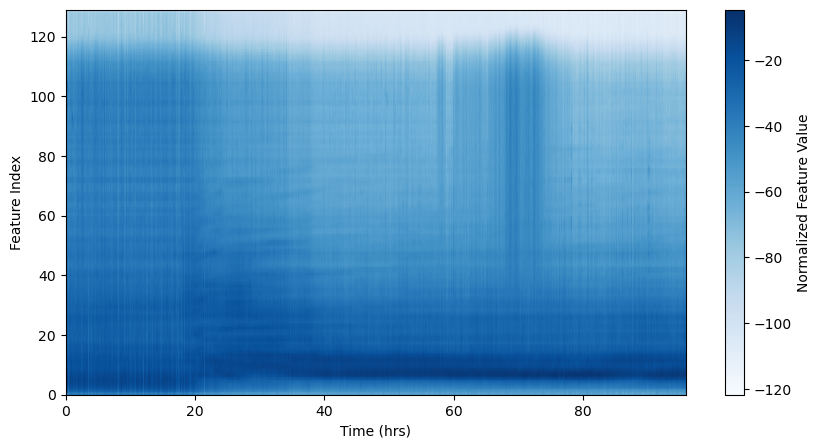

In [5]:
# visualize the features
plt.figure(figsize=(10, 5))
plt.imshow(features.T, aspect='auto', origin='lower', extent=[timestamps_hrs[0], timestamps_hrs[-1], 0, features.shape[1]], cmap='Blues')
plt.colorbar(label='Normalized Feature Value')
plt.xlabel('Time (hrs)')
plt.ylabel('Feature Index')

## 4.2 Apply UMAP and visualize the results

In [6]:
N_COMPONENTS = 2
N_NEIGHBORS = 15
MIN_DIST = 0.1

In [7]:
# reduce the dimensionality of the features
umap = UMAP(
    n_components=N_COMPONENTS,
    n_neighbors=N_NEIGHBORS,
    min_dist=MIN_DIST,
    metric='euclidean',
    random_state=42
)
embedding = umap.fit_transform(features)

/home/steinre/anaconda3/envs/scads2025-unsupervised/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/steinre/anaconda3/envs/scads2025-unsupervised/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


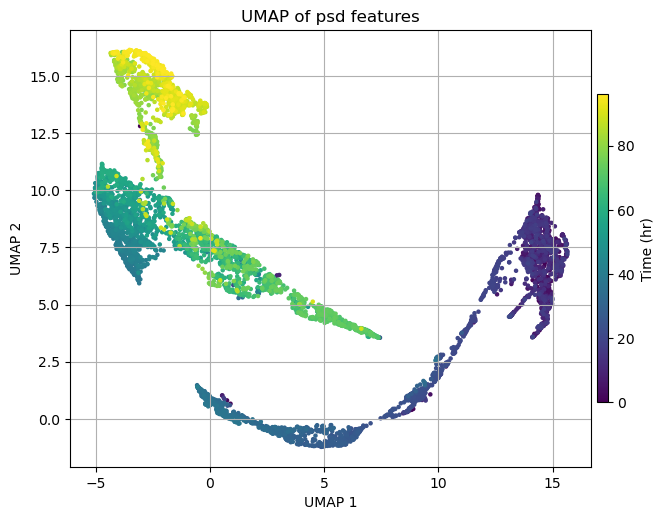

In [8]:
# show the embedding
fig, ax = plt.subplots(figsize=(8, 8))
#ax.scatter(embedding[:, 0], embedding[:, 1], s=5)
img = ax.scatter(embedding[:, 0], embedding[:, 1], s=5, c=timestamps_hrs, cmap='viridis')
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.set_title('UMAP of {} features'.format(FEATURE_TYPE))
ax.grid()
ax.set_aspect('equal', adjustable='box')
# add color bar
cbar = plt.colorbar(img, ax=ax, pad=0.01, aspect=30, shrink=0.5)
cbar.set_label('Time (hr)')
plt.show()


## 4.3 Save the UMAP embedding for the cluster analysis

In [11]:
# save the umap features
np.savez('../example/embedding.npz', embedding=embedding, timestamps_hrs=timestamps_hrs)

Text(0.5, 1.0, 'Which method\nand how many dimensions?')

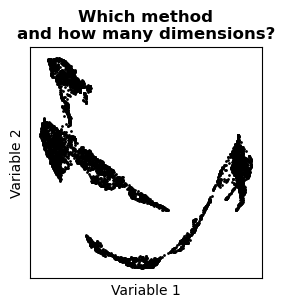

In [12]:
# scatter plot of umap without axis
fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(embedding[:, 0], embedding[:, 1], s=1, color='k')
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('Variable 1')
ax.set_ylabel('Variable 2')
#ax.set_title('Reduce dimensions\nfor visualization', weight='bold')
ax.set_title('Which method\nand how many dimensions?', weight='bold')